In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv
Buffered data was truncated after reaching the output size limit.

In [ ]:
import os
os.listdir("/content")

Total samples: 419509
Constants used: a=0.1, b=0.6

--- Learned Parameters ---
λ = 0.00242798
μ = 20.07453836
c = 0.02812794


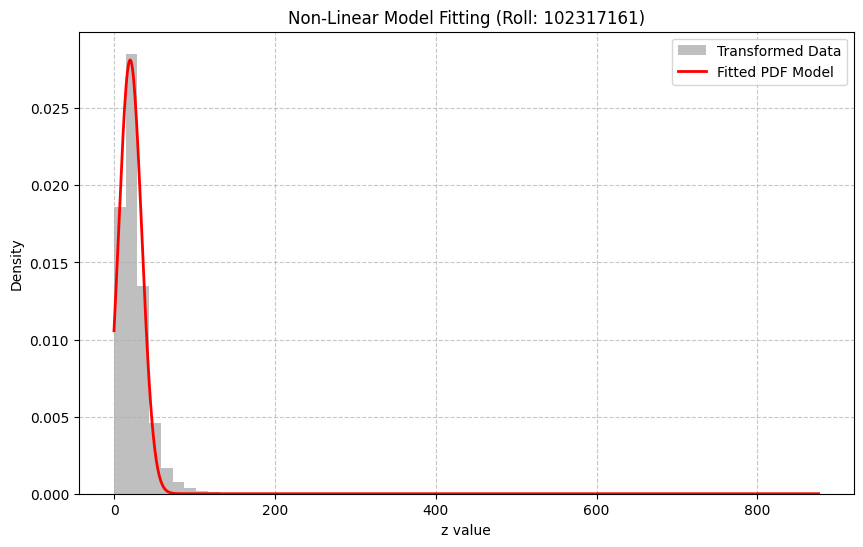

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load data and clean column names
df = pd.read_csv("data.csv", encoding="latin1", low_memory=False)
df.columns = df.columns.str.strip()

# Convert NO2 to numeric and drop missing values
x = pd.to_numeric(df["no2"], errors="coerce").dropna().values
print("Total samples:", len(x))

# My University Roll Number
roll_no = 102317161

# Step-1: Calculate constants a and b
a_const = 0.05 * (roll_no % 7)
b_const = 0.3 * ((roll_no % 5) + 1)

print(f"Constants used: a={a_const}, b={b_const}")

# Data transformation
z_data = x + a_const * np.sin(b_const * x)

# Prepare histogram for curve fitting
counts, bin_edges = np.histogram(z_data, bins=60, density=True)
z_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step-2: Define the PDF function to learn
def target_pdf(z_val, lam, mu, c):
    return c * np.exp(-lam * (z_val - mu)**2)

# Initial guesses for the optimizer
mu_init = np.mean(z_data)
lam_init = 1.0 / (2.0 * np.var(z_data))
c_init = np.max(counts)

# Optimization/Learning process
params, covariance = curve_fit(
    target_pdf,
    z_centers,
    counts,
    p0=[lam_init, mu_init, c_init]
)

# Extract learned parameters
learned_lam = params[0]
learned_mu = params[1]
learned_c = params[2]

# Results output
print("\n--- Learned Parameters ---")
print("λ =", round(learned_lam, 8))
print("μ =", round(learned_mu, 8))
print("c =", round(learned_c, 8))

# Final visualization
z_space = np.linspace(z_data.min(), z_data.max(), 1000)
fitted_curve = target_pdf(z_space, learned_lam, learned_mu, learned_c)

plt.figure(figsize=(10, 6))
plt.hist(z_data, bins=60, density=True, alpha=0.5, label="Transformed Data", color='gray')
plt.plot(z_space, fitted_curve, 'r-', linewidth=2, label="Fitted PDF Model")
plt.xlabel('z value')
plt.ylabel('Density')
plt.title(f"Non-Linear Model Fitting (Roll: {roll_no})")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()